In [1]:
#!/home/akhanal1/Spring2018/pl-env/bin/python3.5
import os
os.chdir('/home/ak/Spring2018/ature')
import sys
import numpy as np
from commons.segmentation import AtureTest
from PIL import Image as IMG
from commons.IMAGE import SegmentedImage
import cv2
import utils.filter_utils as filutils
import utils.img_utils as imgutils
import copy
%load_ext autoreload
%autoreload 2
sep = os.sep

In [31]:
### DRIVE dataset path setup #####
Dirs = {}

Dirs['data']      = 'data'+sep+'DRIVE'+sep+'test'

Dirs['images']    = Dirs['data'] +sep+ 'images'
Dirs['mask']      = Dirs['data'] +sep+ 'mask'
Dirs['truth']     = Dirs['data'] +sep+ '1st_manual'
Dirs['segmented'] = Dirs['data'] +sep+ 'drive_segmented'
Dirs['patches']   = Dirs['data'] +sep+ 'patches'

for k, folder in Dirs.items():
    os.makedirs(folder, exist_ok=True)

def get_mask_file(file_name): 
    return file_name.split('_')[0] + '_test_mask.gif'
def get_ground_truth_file(file_name): 
    return file_name.split('_')[0] + '_manual1.gif'

input_image = '19_test.tif'
###### Path end #####

########### PARAMS ##########
BILATERAL_KERNEL_SIZE = 41
BILATERAL_SIGMA_COLOR = 20
BILATERAL_SIGMA_SPACE = 20

kernels1 = filutils.build_filter_bank(k_size=31, gamma=0.7, lambd=5, sigma=2, orientations=64, psi=0)
kernels2 = filutils.build_filter_bank(k_size=31, gamma=0.7, lambd=8, sigma=3, orientations=64, psi=0)
kernels3 = filutils.build_filter_bank(k_size=31, gamma=0.7, lambd=11, sigma=4, orientations=64, psi=0)
kernels = kernels1 + kernels2 + kernels3

params = {'sk_threshold': 60,
          'alpha': 8.0,
          'orig_contrib': 0.7,
          'seg_threshold': 22}
##### Params end

In [32]:
img_obj = SegmentedImage()

img_obj.load_file(data_dir=Dirs['images'], file_name=input_image)
img_obj.res['orig'] = img_obj.image_arr[:, :, 1]
img_obj.working_arr = img_obj.image_arr[:, :, 1]
img_obj.working_arr = imgutils.whiten_image2d(img_obj.working_arr)

img_obj.load_mask(mask_dir=Dirs['mask'], fget_mask=get_mask_file, erode=True)
img_obj.load_ground_truth(gt_dir=Dirs['truth'], fget_ground_truth=get_ground_truth_file)

img_obj.apply_mask()
img_obj.apply_bilateral(k_size=BILATERAL_KERNEL_SIZE, sig_color=BILATERAL_SIGMA_COLOR, sig_space=BILATERAL_SIGMA_SPACE)
img_obj.working_arr = imgutils.whiten_image2d(img_obj.working_arr)
img_obj.apply_gabor(filter_bank=kernels)
img_obj.working_arr = imgutils.whiten_image2d(img_obj.working_arr)

img_obj.generate_skeleton(threshold=params['sk_threshold'])
img_obj.generate_lattice_graph()

Mask loaded: 19_test_mask.gif
Ground truth loaded: 19_manual1.gif
"apply_bilateral(__)" ... took 0.655 seconds
"apply_gabor(__)" ... took 3.267 seconds
"generate_skeleton(__)" ... took 0.002 seconds
"generate_lattice_graph(__)" ... took 5.942 seconds


In [33]:
### Run for image files with in-time mask erosion
tester = AtureTest(out_dir=Dirs['segmented'])
tester.run(params=params, save_images=False, img_obj=img_obj)
img_obj.res['scores']

"run_segmentation(__)" ...

KeyboardInterrupt: 

In [ ]:
IMG.fromarray(img_obj.res['segmented']).save(img_obj.file_name+'.PNG')

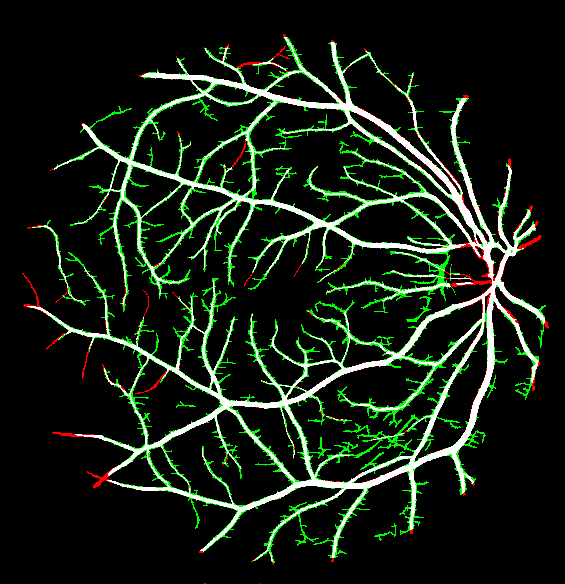

In [30]:
IMG.fromarray(imgutils.get_rgb_scores(img_obj.res['segmented'], img_obj.ground_truth))

In [ ]:
m = img_obj.working_arr.copy()
for n1, n2 in img_obj.res['graph'].edges():
    m[n1] = 255
    m[n2] = 255
IMG.fromarray(m)

In [ ]:
io = SegmentedImage()
io.working_arr = np.array(m.copy(),dtype=np.uint8)
io.res['orig'] = io.working_arr
io.generate_lattice_graph()
io.ground_truth = img_obj.ground_truth
io.mask = img_obj.mask

In [ ]:
pms = {'sk_threshold': 60,
          'alpha': 9.0,
          'orig_contrib': 0.7,
          'seg_threshold': 40}
tester1 = AtureTest(out_dir=Dirs['segmented'])
acc = tester.run(params=pms, save_images=False, img_obj=io)

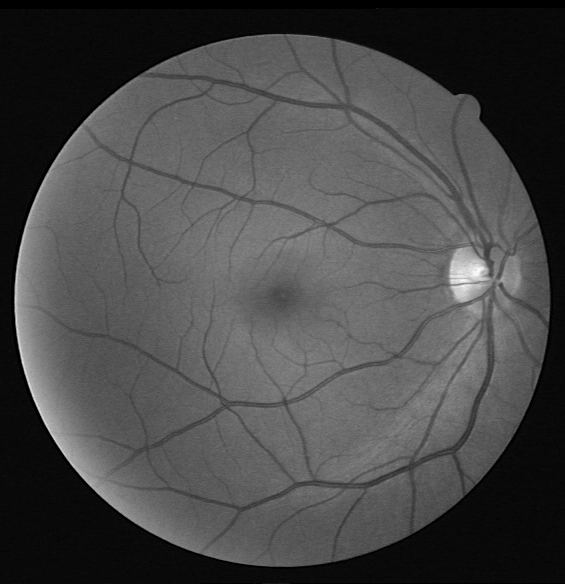

In [13]:
IMG.fromarray(imgutils.whiten_image2d(img_obj.res['orig']))

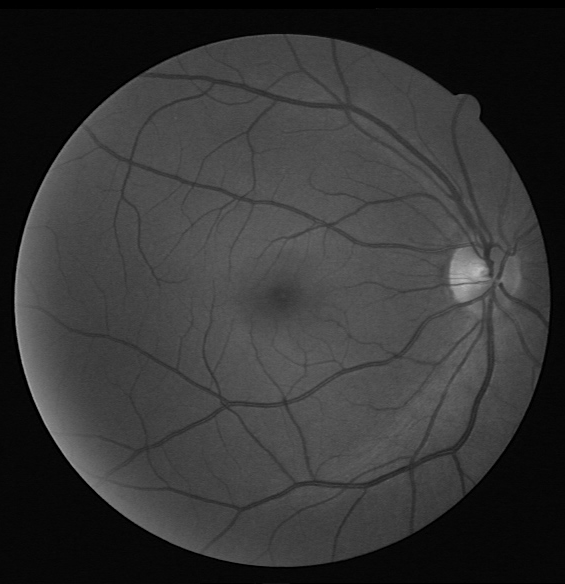

In [16]:
IMG.fromarray(img_obj.res['orig'])

In [18]:
transform = imgutils.whiten_image2d

In [19]:
g = transform(img_obj.res['diff_bilateral'])

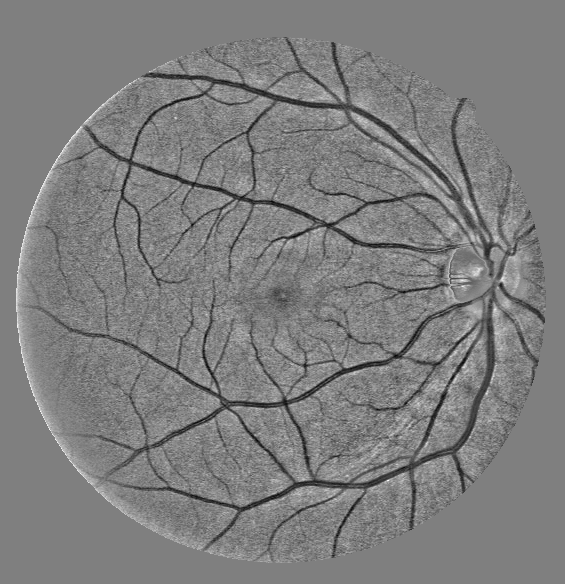

In [20]:
IMG.fromarray(g)

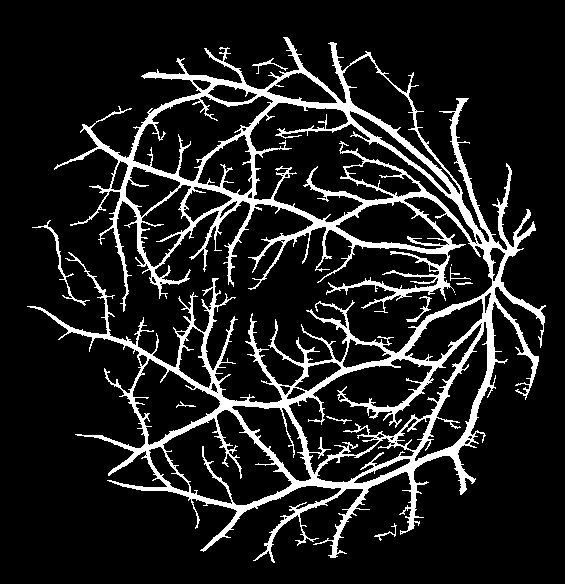

In [29]:
IMG.fromarray(img_obj.res['segmented'])